# A Computational Analysis of Walt Whitman's Stylistic Changes in *Leaves of Grass*

## Jieyan Zhu

16 December 2020

Introduction to Computational Literary Analysis

Department of English and Comparative Literature, Columbia University

Instructor: Jonathan Reeve

# Introduction

Walt Whitman is an icon of American poetry, best known for his *Leaves of Grass*. There are 7 U.S. editions of this classic in Whitman's lifetime, including the 1891-1892 "deathbed" edition, which is merely a reprinting of the 1881-1882 edtion (the definitive edtion in Whitman's eyes) with "annexes". The first edition of *Leaves of Grass* appeared in 1855, when Whitman was 36. The revisions of this masterpiece spanned the rest 37 of his life. Therefore, *Leaves of Grass* is an excellent example of studying how a writer's style changes in his/her career. It is well established that Walt Whitman experienced a major shift of his style during the Civil War. A vareity of computational techniques are applied with the goal to produce a all-round description of Whitman's stylistic changes in *leaves of Grass*.

# Corpus

The TEI XML files of all different U.S. editions of *Leaves of Grass* are available in [The Walt Whitman Archive](https://whitmanarchive.org/). The contents can be extracted from the TEI XML files using the `BeautifulSoup` function. Whitman introduced some different structures in later editions of *Leaves of Grass*, including poems, sections, clusters, etc. As a result, the TEI XML files of these editions contain linegroups not only of `type="linegroup"`, but of `type="poem"`, `type="section"`, etc. It is crucial that the corresponding texts are extracted carefully, as in the `getLineGroups()` function defined below. This variety of structures in TEI XML files also reflects the richness of poetic forms in *Leaves of Grass*. The TXT files are simply not enough for a complete description of such a variety.

In [4]:
import requests 
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
import pandas as pd
from macroetym.main import Text
import nltk
from nltk.sentiment import vader
from nltk.sentiment import SentimentIntensityAnalyzer, SentimentAnalyzer
from statistics import mean, stdev
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import patches as mpatch
import math

In [5]:
stopWords = stopwords.words('english')

In [6]:
whitman1855TEI = open('whitman1855.xml', encoding='utf-8').read()
whitman1856TEI = open('whitman1856.xml', encoding='utf-8').read()
whitman1860TEI = open('whitman1860.xml', encoding='utf-8').read()
whitman1867TEI = open('whitman1867.xml', encoding='utf-8').read()
whitman1871TEI = open('whitman1871-2.xml', encoding='utf-8').read()
whitman1881TEI = open('whitman1881-2.xml', encoding='utf-8').read()
whitman1891TEI = open('whitman1891-2.xml', encoding='utf-8').read()

In [7]:
allWhitmanTEI = [whitman1855TEI, whitman1856TEI, whitman1860TEI, whitman1867TEI, whitman1871TEI, whitman1881TEI, whitman1891TEI]

In [8]:
def getSoup(fileTEI):
    soup = BeautifulSoup(fileTEI, features='lxml')
    return soup

def getLineGroups(soup):
    lineGroups = soup.find_all('lg')
    # There are some typos in the xml files. For example, "linegroup" is misspelled as "lingegroup". 
    # I have reported these typos to the Whitman Archive already.
    stanzaGroups = []
    for lineGroup in lineGroups:
        if len(list(lineGroup.attrs.keys())) > 0 :
            if lineGroup.attrs['type'] == "linegroup" or lineGroup.attrs['type'] == "lingegroup":
                stanzaGroups.append(lineGroup)
            elif lineGroup.attrs['type'] == "section":
                flag = True
                des = list(lineGroup.descendants)
                for item in des:
                    try:
                        if len(item.attrs.keys()) > 0:
                            if item.attrs['type'] == 'linegroup' or item.attrs['type'] == 'lingegroup' or item.attrs['type'] == 'poem':
                                flag = False
                    except:
                        continue
                if flag == True:
                    stanzaGroups.append(lineGroup)
            elif lineGroup.attrs['type'] == "poem":
                des = list(lineGroup.descendants)
                flag = True
                for item in des:
                    try:
                        if len(item.attrs.keys()) > 0:
                            if item.attrs['type'] == 'linegroup' or item.attrs['type'] == 'lingegroup' or item.attrs['type'] == 'section':
                                flag = False
                    except:
                        continue
                if flag == True:
                    stanzaGroups.append(lineGroup)
    return stanzaGroups
    
def getText(lineGroups):
    text = [lineGroup.text for lineGroup in lineGroups]
    return ''.join(text)
    
def getTitle(soup):
    title = soup.title.text
    return title

In [9]:
whitmanSoups = [getSoup(fileTEI) for fileTEI in allWhitmanTEI]

In [10]:
whitmanTitles = [getTitle(soup).replace('\n', '') for soup in whitmanSoups]
whitmanTitles

['Leaves of Grass (1855)',
 'Leaves of Grass (1856)',
 'Leaves of Grass (1860–61)',
 'Leaves of Grass (1867)',
 'Leaves of Grass (1871–72)',
 'Leaves of Grass (1881-82)',
 'Leaves of Grass (1891-92)']

In [11]:
whitmanStanzasNumber = {title: len(getLineGroups(soup)) for title, soup in zip(whitmanTitles, whitmanSoups)}
whitmanStanzas = {title: getLineGroups(soup) for title, soup in zip(whitmanTitles, whitmanSoups)}
whitmanStanzasNumber

{'Leaves of Grass (1855)': 643,
 'Leaves of Grass (1856)': 969,
 'Leaves of Grass (1860–61)': 1418,
 'Leaves of Grass (1867)': 1627,
 'Leaves of Grass (1871–72)': 1381,
 'Leaves of Grass (1881-82)': 1948,
 'Leaves of Grass (1891-92)': 2072}

In general, the number of stanzas increased as Whitman added more and more contents to *Leaves of Grass*, except for the 1871-72 edition, where the number of stanzas dropped a bit. The deathbed edition (1891-1892) is almost three times the size of the first edition if the changes in the average stanza size is not considered. The 1881-82 edtion, marks the single largest expansion as Whitman treated it as the definitive edition of *Leaves of Grass*.

In [12]:
whitmanTexts = [getText(getLineGroups(soup)) for soup in whitmanSoups]
for text in whitmanTexts:
    print(text[:50],end='\n')
    print(text[-50:], end='\n\n')


I CELEBRATE myself,
And what I assume you shall a
 they merge in the light, death is great as life.



I CELEBRATE myself, 
And what I assume you shall 
nd two waiters.
The Tragic Muse in a gold frame. 



FREE, fresh, savage,
Fluent, luxuriant, self-cont
rials,
I am as one disembodied, triumphant, dead.




INSCRIPTION.

SMALL
is the theme of the followin
rials,
I am as one disembodied, triumphant, dead.



ONE'S-SELF I sing—a simple, separate Person;
Yet 
rials;
I am as one disembodied, triumphant, dead.



ONE'S-SELF I sing, a simple separate person,
Yet 
rials,
I am as one disembodied, triumphant, dead.



COME, said my Soul,
Such verses for my Body let u
ripples, half-caught voices, echo from the shore.




# Stanzas

Whitman is known to experiment with stanza forms in different editions of *Leaves of Grass*. Whitman numbered all stanzas in the 1860-61 edition, and he numbered all sections in the 1867 edition. He deleted stanza numbers but preserved section numbers in the 1881-82 edtion. In addition, he first introduced "clusters" starting from the 1860 edtion (Warren, "Styles and Technique(s)"). It is therefore meaningful to study how the stanzas vary statistically in different editions as it could reveal how the structure changes in *Leaves of Grass* with time. All stanzas (a poem with only one stanza is treated as one stanza)  are extracted in this section and statistical tools are applied to compute the average and the standard deviation in stanza lengths of all editions.


In [13]:
def getLines(lineGroup):
    lines = lineGroup.find_all('l')
    return lines

In [14]:
whitmanStanzaSizes = {}
for title, soup in zip(whitmanTitles, whitmanSoups):
    lineGroups = getLineGroups(soup)
    lineNumberList = []
    for lineGroup in lineGroups:
        lineNumber = len(getLines(lineGroup))
        lineNumberList.append(lineNumber)
    whitmanStanzaSizes[title] = lineNumberList

In [15]:
len(whitmanStanzaSizes['Leaves of Grass (1881-82)'])

1948

In [16]:
whitmanStanzaStats = {title: [mean(stanzaSizes), stdev(stanzaSizes)] for title, stanzaSizes in whitmanStanzaSizes.items()}

In [17]:
pd.DataFrame(whitmanStanzaStats, index = ['mean', 'std'])

,Leaves of Grass (1855),Leaves of Grass (1856),Leaves of Grass (1860–61),Leaves of Grass (1867),Leaves of Grass (1871–72),Leaves of Grass (1881-82),Leaves of Grass (1891-92)
mean,3.600311,4.393189,4.750353,4.872772,5.005793,5.099589,5.198359
std,5.372753,6.043164,6.542064,5.912995,6.328104,5.397439,5.334738


It is obvious that the average stanza size keeps growing as Whitman updated his *Leaves of Grass*. The standard deviation first increases to over 6, then drops to around 5.35. The result is in contrast to the literary critics that Whitman wrote shorter poems in his late career, often fewer than ten lines. We do observe a decrease in the standard deviation of stanza lengths in the last decade of Whitman's career, which indicates that Whitman engaged in less artistic manipulation of stanza forms in his last decade. As some literary critics suggest, the decrease in irregularity of stanzas marks exhaustion of Whitman's poetic power (Warren, "Styles and Technique(s)"). 

# Parentheses

It is also well noted that Whitman's use of parenthese changed dramatically in his career. In the first edition (1855) of *Leaves of Grass*, only two sets of parentheses appear in the entire text. Here we count all occurrences of parentheses in each edition and divide them by the total number of words. The resulting quantity is the frequency of parentheses.

In [18]:
whitmanWords = {title: nltk.word_tokenize(text.lower()) for title, text in zip(whitmanTitles, whitmanTexts)}

In [19]:
whitmanParenthesesRatio = {title: '{:f}'.format(words.count('(') / len(words)) for title, words in whitmanWords.items()}

In [20]:
whitmanParenthesesRatio

{'Leaves of Grass (1855)': '0.000054',
 'Leaves of Grass (1856)': '0.000310',
 'Leaves of Grass (1860–61)': '0.001154',
 'Leaves of Grass (1867)': '0.002288',
 'Leaves of Grass (1871–72)': '0.002669',
 'Leaves of Grass (1881-82)': '0.002947',
 'Leaves of Grass (1891-92)': '0.003301'}

There is an increase of the use of parentheses in each edition, especially in the 1860-61 edition and 1867 edition. Literary scholars tend to attribute the increase in pareentheses to the postwar trauma. Whitman treated the Civil War itself as a parenthetical event, a temporary break from the normalcy of the national history (Price 687). In addition, the materials within parentheses of a text are normally of marginal importance, and the readers should be able to skip the materials enclosed by parentheses yet still have a good understanding of the whole text. The 4-year war thus has no effect on the "celebration" theme of the book.

Another interpretation of parentheses is that they make the text fragile. During the war Whitman had the chance to travel to the battlefield in search of his borther, who enlisted in the Union army when the war started. In a field hospital at Fredericksburg, he encountered a sight that he would never forget: "... a heap of amputated feet, legs, arms, hands, etc., a full load for a one-horse cart." As he wrote in the journal: "... human fragments, cut, bloody, black and blue, swelled and sickening." (Folsom and Price, "Walt Whitman."). Whitman had long been a poet who celebrated physical body. For example, the first edition begins with the praise of the physical body: 
<div align="center">"I CELEBRATE myself,</div>
<div align="center">And what I assume you shall assume,</div>
<div align="center">For every atom belonging to me as good belongs to you."</div>

(Whitman 13).The horrible scene of war was a shock to Whitman, and as a result, he reconstructed his *Leaves of Grass*, along with the reconstruction of the nation, by integrating the trauma of the Civil War with the orginal hope for a democratic future for America. 

The computation here reveals a less-known fact that Whitman anticipated the occurrence of the Civil War because he drastically increased the use of parentheses in the 1860 edtion, one year before the war happend.

# Self-Identity

In [21]:
def findSelves1(words):
    counts = words.count('i')
    return counts

In [22]:
def findSelves2(words):
    counts = words.count('i') + words.count('myself') + words.count('me') + words.count('self') + words.count('my') + words.count('mine')
    return counts

In [23]:
whitmanSelvesRatio1 = {title: findSelves1(words)/len(words) for title, words in whitmanWords.items()}
whitmanSelvesRatio2 = {title: findSelves2(words)/len(words) for title, words in whitmanWords.items()}

In [24]:
whitmanSelvesRatio1

{'Leaves of Grass (1855)': 0.019836043542534605,
 'Leaves of Grass (1856)': 0.020841080947068304,
 'Leaves of Grass (1860–61)': 0.022255974078574322,
 'Leaves of Grass (1867)': 0.021635496883021636,
 'Leaves of Grass (1871–72)': 0.02093330134357006,
 'Leaves of Grass (1881-82)': 0.020703000938023946,
 'Leaves of Grass (1891-92)': 0.019670968269991543}

In [25]:
whitmanSelvesRatio2

{'Leaves of Grass (1855)': 0.03593603010348072,
 'Leaves of Grass (1856)': 0.034848766579893393,
 'Leaves of Grass (1860–61)': 0.03876063183475091,
 'Leaves of Grass (1867)': 0.03825065046187159,
 'Leaves of Grass (1871–72)': 0.03694817658349328,
 'Leaves of Grass (1881-82)': 0.036331809352172596,
 'Leaves of Grass (1891-92)': 0.03481979646959321}

# Stylometry and Macro-Etymological Analysis

## Stylometry

Stylometry takes the featured words of texts, and compares them with each other using statistical methods. In this section the principal component analysis (PCA) is used to visualize the distribution of styles of different works. Importing the stop words from nltk, we focus on the content words in different editions of *Leaves of Grass*.

In [26]:
tfidfVectorizer = TfidfVectorizer(max_features=400, stop_words=stopWords)
textMatrix = tfidfVectorizer.fit_transform(whitmanTexts)
denseTextMatrix = textMatrix.todense()
denseTextMatrix.shape

(7, 400)

In [27]:
pca = PCA(n_components=2)
textPoints = pca.fit_transform(denseTextMatrix)
textPoints.shape

(7, 2)

In [28]:
def getTextHTML(url):
    response = requests.get(url)
    if response.ok:
        text = response.text
        return text
    else:
        print('ERROR: Invalid url!')

In [29]:
reviews1855 = getTextHTML('https://whitmanarchive.org/criticism/reviews/lg1855/index.html')
reviews1856 = getTextHTML('https://whitmanarchive.org/criticism/reviews/lg1856/index.html')
reviews1860 = getTextHTML('https://whitmanarchive.org/criticism/reviews/lg1860/index.html')
reviews1867 = getTextHTML('https://whitmanarchive.org/criticism/reviews/lg1867/index.html')
reviews1871 = getTextHTML('https://whitmanarchive.org/criticism/reviews/lg1871/index.html')
reviews1881 = getTextHTML('https://whitmanarchive.org/criticism/reviews/lg1881/index.html')
reviews1891 = getTextHTML('https://whitmanarchive.org/criticism/reviews/lg1891/index.html')

In [30]:
allReviews = [reviews1855, reviews1856, reviews1860, reviews1867, reviews1871, reviews1881, reviews1891]

In [31]:
reviewsSoups = [getSoup(reviews) for reviews in allReviews]

In [32]:
reviewsNums = [len(soup.find_all('li')) for soup in reviewsSoups]
reviewsNums

[26, 7, 35, 5, 5, 41, 1]

In [33]:
def euclideanD(df):
    allDistances = []
    rowNums = df.shape[0]
    for i in range(rowNums):
        if i > 0:
            xDist = (df.loc[i][0] - df.loc[i-1][0])**2
            yDist = (df.loc[i][1] - df.loc[i-1][1])**2
            sqrtDist = math.sqrt(xDist + yDist)
            allDistances.append(sqrtDist)
        else:
            sqrtDist = math.sqrt(df.loc[0][0]**2 + df.loc[0][0]**2)
            allDistances.append(sqrtDist)
    return allDistances

In [34]:
textDFRaw = pd.DataFrame(textPoints)
whitmanDists = euclideanD(textDFRaw)
whitmanDists

[0.28497165019117665,
 0.24617863950580424,
 0.08969459546622933,
 0.09902111889812168,
 0.017314074649070716,
 0.30671428369662973,
 0.03656532700891079]

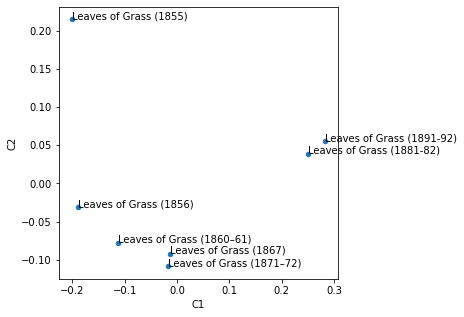

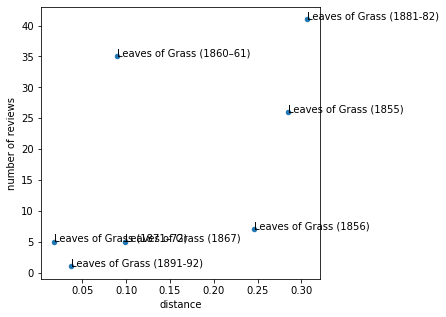

In [35]:
textDF = pd.DataFrame(textPoints, index=whitmanTitles, columns=['C1', 'C2'])
ax = textDF.plot(kind='scatter', x='C1', y='C2', figsize=(5,5))
for title, point in textDF.iterrows():
    ax.annotate(title, point)
plt.savefig('stylometry.png',dpi=600)
    
correlationDF = pd.DataFrame(zip(whitmanDists, reviewsNums), index=whitmanTitles, columns=['distance', 'number of reviews'])
ax = correlationDF.plot(kind='scatter', x='distance', y='number of reviews', figsize=(5,5))
for title, point in correlationDF.iterrows():
    ax.annotate(title, point)

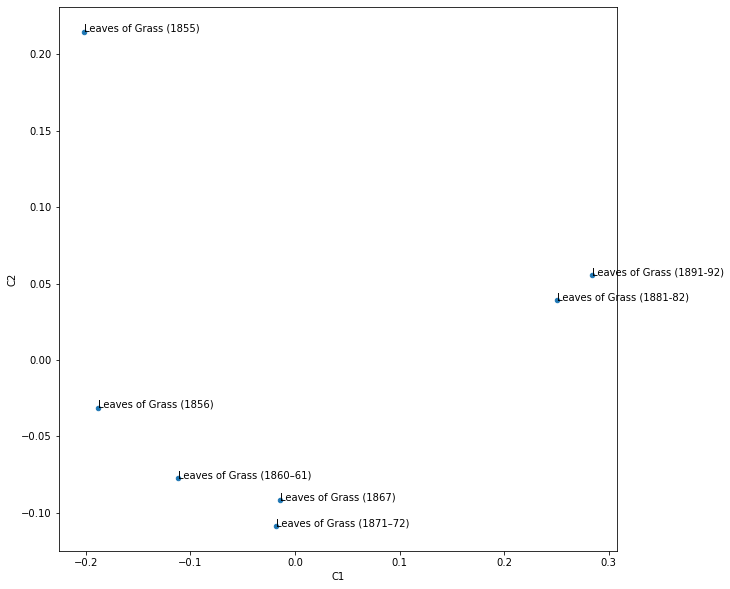

In [36]:
textDF = pd.DataFrame(textPoints, index=whitmanTitles, columns=['C1', 'C2'])
ax = textDF.plot(kind='scatter', x='C1', y='C2',figsize=(10,10))
for title, point in textDF.iterrows():
    ax.annotate(title, point)
plt.savefig('stylometry.png',dpi=600)

To justify the correctness of the use of stylometry, I calculated the number of review articles at the time of publication available on the Whitman Archive, as well as the distance between each edition from the previous one in the stylometry figure. As shown in the second scatter plot, a correlation exists between the two quantities.

My hypothesis is that the more distinct some edition is from the previous one, the more attention it receives from the media, and therefore the more review articles at the time of publication. In fact, Whitman did not like the critics in his early career since most of them were negative. One 1856 review even suggested Whitman be sent to an insane asylum. To combat these negative reviews and bolster sales, Whitman wrote favorable reviews of his own work. One example is a short piece appearing in the *United States Review* in 1855. However, as his works became more and more recognized by the public, he started to receive more favorable reviews (Ferro, *When Walt Whitman Reviewed His Own Book*). The two outliers in the graph are the 1856 edition and the 1860-61 edition, both published in his early career. Consequently, a strict correlation between the style change and the number of reviews is not expected in the early editions.

## Macro-Etymological Analysis

Aside from studying featured words, it is also worthwile to study the origins of words, i.e. etymological analysis. Macro-etymological analysis of *Leaves of Grass* is particular interesting considering Whitman's personal experience. Whitman left the New York area for the first time in his life in 1848, heading for New Orleans with his younger brother. He encountered the diversity of America for the first time there, a city that fit him more than New York. It is highly possible that Whitman developed his fondness for using French words during his short stay in the south (Folsom and Price, "Walt Whitman.").

In [37]:
whitmanEtyms = [Text(text) for text in whitmanTexts]

In [38]:
etymsData = {title: etym.prettyStats for title, etym in zip(whitmanTitles, whitmanEtyms)}

In [39]:
etymsDF = pd.DataFrame(etymsData).fillna(0)

In [40]:
pd.concat([etymsDF[:3], etymsDF[5:8]])

,Leaves of Grass (1855),Leaves of Grass (1856),Leaves of Grass (1860–61),Leaves of Grass (1867),Leaves of Grass (1871–72),Leaves of Grass (1881-82),Leaves of Grass (1891-92)
Old English (ca. 450-1100),41.65,38.16,36.21,36.04,36.43,34.90,34.71
Latin,13.89,15.89,17.75,17.97,17.55,19.01,19.31
Old French (842-ca. 1400),20.84,21.64,21.18,20.86,21.01,20.94,20.81
Anglo-Norman,6.38,6.38,6.46,6.40,6.28,6.22,6.15
Middle French (ca. 1400-1600),3.90,4.01,4.47,4.53,4.54,4.48,4.39
Middle Low German,0.06,0.07,0.08,0.05,0.05,0.05,0.05


Only words of origins with significant portion (> 4 percent) of the texts are listed in the table above.It is obvious that the use of words with French Origin (both French and Middle French) increases in each edition of *Leaves of Grass*, suggesting Whitman's favor of using French words. In addition, latinate words increase in every edition except for the 1871 edition. This result is slightly different from another [macro-etymological analysis](https://jonreeve.com/2014/09/macroetymology-of-whitman-editions/) of *Leave of Grass* (Reeve, *A Comparative Macro-Etymology of Whitman Editions*).

# Sentiment Analysis

Whitman wrote *Leaves of Grass* in celebration of American democracy and liberty, but switched gears to incorporate trauma after the war in postwar editions, as a period of poetic reconstruction. The 1867 edtion is the first postwar edition, being the most carelessly printed and the most chaotic among all editions. Maybe Whitman made use of such chaos as a representation of chaos and despair the war had brought to America (Folsom and Price, "Walt Whitman."). The assasination of President Lincoln in 1865 made Whitman wrote the poem *O Captain! My Captain!* filled with misery. The sad poem first appeared in the 1867 edition (the first postwar edition). The following is the first section of the poem:
<div align="center">
"1
</div>    
<div align="center">
O CAPTAIN! my captain! our fearful trip is done;
</div>
<div align="center">
The ship has weather'd every rack, the prize we sought is
won;
</div>
<div align="center">
The port is near, the bells I hear, the people all exulting,
</div>
<div align="center">
While follow eyes the steady keel, the vessel grim and daring:
    </div>
<div align="center">
   But O heart! heart! heart!
    </div>
<div align="center">
     Leave you not the little spot,
    </div>
<div align="center">
       Where on the deck my captain lies.
    </div>
<div align="center">
         Fallen cold and dead."
    </div>

(Whitman 13).Sentiment analysis, as a method to measure the emotional aspect of texts, quantitatively measures Whitman's pessimistic mood after the war. We apply a lexical sentiment analyzer to each sentence of *Leaves of Grass* and get an average polarity score for each edition. The higher the polarity score is, the more positive the sentiment is. My hypothesis is that the editions before the Civil War generally have higher polarity scores than those after the Civil War because of the reasons listed above.

In [41]:
sentimentAnalyzer = SentimentIntensityAnalyzer()

In [42]:
def getSentiment(text):
    return sentimentAnalyzer.polarity_scores(text)['compound']

In [43]:
whitmanLines = {}
for title, stanzas in whitmanStanzas.items():
    allLines = []
    for stanza in stanzas:
        lines = stanza.find_all('l')
        allLines += lines
    whitmanLines[title] = allLines
len(whitmanLines['Leaves of Grass (1855)'])

2315

In [44]:
whitmanSentiments = {}
for title, lines in whitmanLines.items():
    whitmanSentiments[title] = mean([getSentiment(line.text) for line in lines])
whitmanSentiments

{'Leaves of Grass (1855)': 0.0886750323974082,
 'Leaves of Grass (1856)': 0.09244423302795396,
 'Leaves of Grass (1860–61)': 0.09082384204275534,
 'Leaves of Grass (1867)': 0.07928255549949546,
 'Leaves of Grass (1871–72)': 0.07951825546072618,
 'Leaves of Grass (1881-82)': 0.0834055868733642,
 'Leaves of Grass (1891-92)': 0.08111456689258194}

In [47]:
whitmanAllSentiments = {}
for title, lines in whitmanLines.items():
    whitmanAllSentiments[title] = pd.Series([getSentiment(line.text) for line in lines])

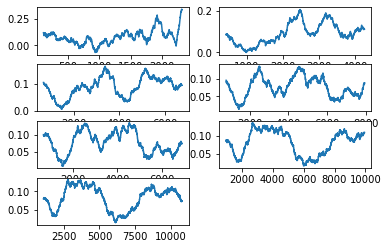

In [63]:
plt.figure()
plt.subplot(421)
plt.plot(whitmanAllSentiments['Leaves of Grass (1855)'].rolling(int(0.05*len(whitmanLines['Leaves of Grass (1855)']))).mean())

plt.subplot(422)
plt.plot(whitmanAllSentiments['Leaves of Grass (1856)'].rolling(int(0.1*len(whitmanLines['Leaves of Grass (1856)']))).mean())

plt.subplot(423)
plt.plot(whitmanAllSentiments['Leaves of Grass (1860–61)'].rolling(int(0.1*len(whitmanLines['Leaves of Grass (1860–61)']))).mean())

plt.subplot(424)
plt.plot(whitmanAllSentiments['Leaves of Grass (1867)'].rolling(int(0.1*len(whitmanLines['Leaves of Grass (1867)']))).mean())

plt.subplot(425)
plt.plot(whitmanAllSentiments['Leaves of Grass (1871–72)'].rolling(int(0.1*len(whitmanLines['Leaves of Grass (1871–72)']))).mean())

plt.subplot(426)
plt.plot(whitmanAllSentiments['Leaves of Grass (1881-82)'].rolling(int(0.1*len(whitmanLines['Leaves of Grass (1881-82)']))).mean())

plt.subplot(427)
plt.plot(whitmanAllSentiments['Leaves of Grass (1891-92)'].rolling(int(0.1*len(whitmanLines['Leaves of Grass (1891-92)']))).mean())

The result of the sentiment analysis is exactly as I expected. All editions before the war have polarity scores around 0.09, with a plunge in the 1867 edition, the first postwar edition. The polarity scores of editions afterwards increase slightly as Whitman gradually regained his confidence in America's future, but are still much lower than the pre-war editions.

# Conclusion

From the analysis above, Whitman's writing style changes in editions of *Leaves of Grass*. Some elements of style changed consistently througout his career, regardless of the Civil War. One example is his increasing favor of French terms, which could possibly be derived from his trip to New Orleans in 1948, long before he published his first edition of *Leaves of Grass*. Similarly, his use of parentheses increased drastically (about 60 times) in his revisions of the book. 

The Civil War did transform Whitman's styles in certain ways. His sentiment in the first postwar edition (the 1867 edition) plunged by around 12 percent as he included postwar trauma in his project of reconstructing *Leaves of Grass*. In fact, all postwar editions are much more pessimistic compared to editions before the war, in agreement with the literary critics.

The stylometry changed in an unexpected way in Whitman's career. The two largest shifts in his writing style happend in his early and late career correspondingly. His style changed significantly when he published the first revision of his 1855 edition, as well as when he published the "definitive" 1881 edition. The first revision was important for him since the first edition of *Leaves of Grass* did not sell well, and that probably forced him to change his style in the 1856 edition. The 1881 edition was Whitman's unification of his poems, which had a unique style in the stylometry graph.

# References

Cohen, Matt, et al. *The Walt Whitman Archive*. https://whitmanarchive.org/

Ferro, Shaunacy. *When Whitman Reviewed His Own Book*. https://www.mentalfloss.com/article/77096/when-walt-whitman-reviewed-his-own-book

Folsom, Ed and Price, Kenneth M. "Walt Whitman." *The Walt Whitman Archive*. https://whitmanarchive.org/biography/walt_whitman/index.html 

Price, Kenneth M. "Love, War, and Revision in Whitman's Blue Book." huntington library quarterly 73.4 (2010): 679-692.

Reeve, Jonathan. *A Comparative Macro-Etymology of Whitman Editions*. https://jonreeve.com/2014/09/macroetymology-of-whitman-editions/

Warren, James P. "Styles and Technique(s)." *Walt Whitman: An Encyclopedia*, 1998.

Whitman, Walt. *Leaves of Grass*, 1855.

Whitman, Walt. *Leaves of Grass*, 1867.

# Appendix

The appendix is the study of the average hue of each edition and its relation to the average polarity score above. If sentiments and colors are correlated, then a mapping between a 1 dimensional space (the polarity score) and a 3 dimensional space (RGB values of colors) can be constructed. Unfortunately, no such mapping is observed in my results, partly due to the lack of word sense diambiguity techniques for extracting colors accurately.

In [36]:
# Import the xkcd color table
response = requests.get('https://xkcd.com/color/rgb.txt')
response.ok

True

In [37]:
xkcdText = response.text
xkcdList = xkcdText.split('\n')
xkcdList = xkcdList[1:]

In [38]:
colorDict = {}
for colorItem in xkcdList:
    tempList = colorItem.split('#')
    if len(tempList) >= 2:
        tempList[0] = tempList[0].replace('\t', '')
        tempList[1] = tempList[1].replace('\t', '')
        colorDict[tempList[0]] = tempList[1]

In [39]:
list(colorDict.items())[:5]

[('cloudy blue', 'acc2d9'),
 ('dark pastel green', '56ae57'),
 ('dust', 'b2996e'),
 ('electric lime', 'a8ff04'),
 ('fresh green', '69d84f')]

In [40]:
# Convert hexadecimal numbers to decimal numbers (RGB)
def hex2DecRGB(numString):
    rValue = int(numString[0:2], base=16)
    gValue = int(numString[2:4], base=16)
    bValue = int(numString[4:6], base=16)
    return [rValue, gValue, bValue]

In [41]:
colorDictDec = {color: hex2DecRGB(rgb) for color, rgb in colorDict.items()}
allColors = list(colorDictDec.keys())

In [42]:
list(colorDictDec.items())[:5]

[('cloudy blue', [172, 194, 217]),
 ('dark pastel green', [86, 174, 87]),
 ('dust', [178, 153, 110]),
 ('electric lime', [168, 255, 4]),
 ('fresh green', [105, 216, 79])]

In [43]:
def getTokenNumber(token, text):
    text = text.lower()
    totalNumber = 0
    i = 0
    while i != -1:
        i = text.find(token, i+1)
        if i != -1:
            if text[i-1].isalpha() == False and text[i+len(token)].isalpha() == False:
                totalNumber += 1
    return totalNumber

def getColors(text):
    textColors = {}
    for color in allColors:
        tokenNumber = getTokenNumber(color, text)
        if tokenNumber > 0:
            textColors[color] = tokenNumber
    return textColors

In [44]:
whitmanColorDict = {title: getColors(text) for title, text in zip(whitmanTitles, whitmanTexts)}

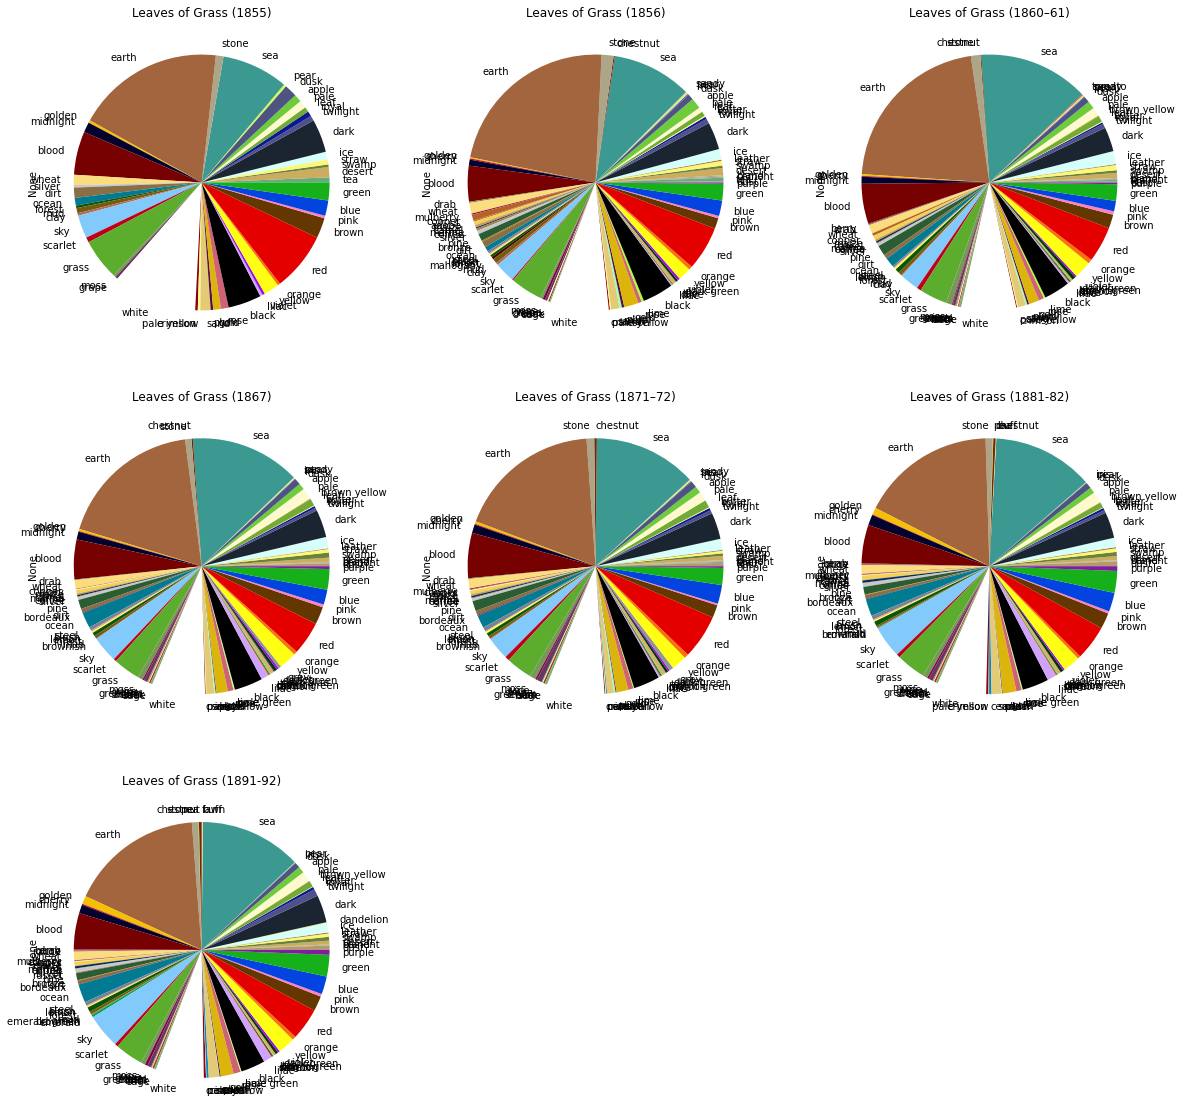

In [45]:
i = 0 
for title in whitmanTitles:
    i = i + 1
    plt.subplot(3,3,i)
    cmap = matplotlib.colors.ListedColormap([f"xkcd:{color}" for color in list(whitmanColorDict[title].keys())])
    pd.Series(whitmanColorDict[title]).plot(kind='pie', colormap=cmap, figsize=(20,20), title=title)

In [46]:
def getMeanHue(textColorDict): 
    rTotal, gTotal, bTotal = 0, 0, 0
    colorTotal = 0
    for color in list(textColorDict.keys()):
        rTotal += (textColorDict[color])*(colorDictDec[color][0])
        gTotal += (textColorDict[color])*(colorDictDec[color][1])
        bTotal += (textColorDict[color])*(colorDictDec[color][2])
        colorTotal += textColorDict[color]
    rMean = rTotal / colorTotal
    gMean = gTotal / colorTotal
    bMean = bTotal / colorTotal
    return [rMean, gMean, bMean]

whitmanMeanHue = {}
for title in whitmanTitles:
    textColors = whitmanColorDict[title]
    whitmanMeanHue[title] = getMeanHue(textColors)

In [47]:
pd.DataFrame(whitmanMeanHue, index = ['r', 'g', 'b'])

,Leaves of Grass (1855),Leaves of Grass (1856),Leaves of Grass (1860–61),Leaves of Grass (1867),Leaves of Grass (1871–72),Leaves of Grass (1881-82),Leaves of Grass (1891-92)
r,140.677419,139.390060,135.630077,131.313004,133.215054,130.714605,130.255464
g,120.596774,122.740964,125.448957,125.904036,122.515054,125.068554,125.737705
b,93.906452,91.224398,93.610318,97.895067,95.869892,98.046200,99.059426


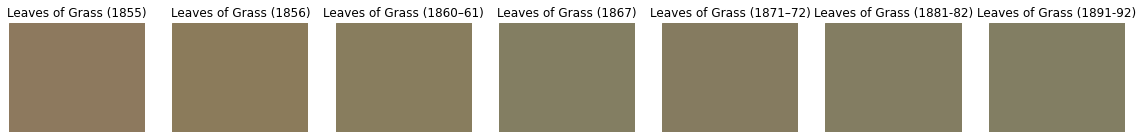

In [48]:
# Average hue of each edition
fig, axs = plt.subplots(1, 7, figsize=(20,2) ,sharey = True)
j = 0
for title in whitmanTitles:
    rect = mpatch.Rectangle((0,0), 1, 1, color = [colorValue / 255 for colorValue in whitmanMeanHue[title]])
    axs[j].add_patch(rect)
    axs[j].set_axis_off()
    axs[j].set_title(title)
    j += 1